In [1]:
# SVM Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
Salary_Train = pd.read_csv('D:/DS Assignments/SVM/SalaryData_Train.csv')

In [3]:
Salary_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
Salary_Test= pd.read_csv('D:/DS Assignments/SVM/SalaryData_Test.csv')

In [5]:
Salary_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
Salary_Train.shape

(30161, 14)

In [7]:
Salary_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
Salary_Train['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [9]:
Salary_Train['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [10]:
Salary_Train['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [11]:
Salary_Train['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
Salary_Train['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [13]:
Salary_Train['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [14]:
Salary_Train['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [15]:
Salary_Train['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [16]:
Salary_Train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_name = label_encoder.fit(Salary_Train['workclass'])
Salary_Train['workclass'] = encoded_name.transform(Salary_Train['workclass'])
encoded_name = label_encoder.fit(Salary_Train['education'])
Salary_Train['education'] = encoded_name.transform(Salary_Train['education'])
encoded_name = label_encoder.fit(Salary_Train['maritalstatus'])
Salary_Train['maritalstatus'] = encoded_name.transform(Salary_Train['maritalstatus'])
encoded_name = label_encoder.fit(Salary_Train['occupation'])
Salary_Train['occupation'] = encoded_name.transform(Salary_Train['occupation'])
encoded_name = label_encoder.fit(Salary_Train['relationship'])
Salary_Train['relationship'] = encoded_name.transform(Salary_Train['relationship'])
encoded_name = label_encoder.fit(Salary_Train['race'])
Salary_Train['race'] = encoded_name.transform(Salary_Train['race'])
encoded_name = label_encoder.fit(Salary_Train['sex'])
Salary_Train['sex'] = encoded_name.transform(Salary_Train['sex'])
encoded_name = label_encoder.fit(Salary_Train['native'])
Salary_Train['native'] = encoded_name.transform(Salary_Train['native'])
encoded_name = label_encoder.fit(Salary_Train['Salary'])
Salary_Train['Salary'] = encoded_name.transform(Salary_Train['Salary'])
Salary_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_name = label_encoder.fit(Salary_Test['workclass'])
Salary_Test['workclass'] = encoded_name.transform(Salary_Test['workclass'])
encoded_name = label_encoder.fit(Salary_Test['education'])
Salary_Test['education'] = encoded_name.transform(Salary_Test['education'])
encoded_name = label_encoder.fit(Salary_Test['maritalstatus'])
Salary_Test['maritalstatus'] = encoded_name.transform(Salary_Test['maritalstatus'])
encoded_name = label_encoder.fit(Salary_Test['occupation'])
Salary_Test['occupation'] = encoded_name.transform(Salary_Test['occupation'])
encoded_name = label_encoder.fit(Salary_Test['relationship'])
Salary_Test['relationship'] = encoded_name.transform(Salary_Test['relationship'])
encoded_name = label_encoder.fit(Salary_Test['race'])
Salary_Test['race'] = encoded_name.transform(Salary_Test['race'])
encoded_name = label_encoder.fit(Salary_Test['sex'])
Salary_Test['sex'] = encoded_name.transform(Salary_Test['sex'])
encoded_name = label_encoder.fit(Salary_Test['native'])
Salary_Test['native'] = encoded_name.transform(Salary_Test['native'])
encoded_name = label_encoder.fit(Salary_Test['Salary'])
Salary_Test['Salary'] = encoded_name.transform(Salary_Test['Salary'])
Salary_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [19]:
X_train = Salary_Train.iloc[:, :13].values

In [20]:
X_train.shape

(30161, 13)

In [21]:
y_train = Salary_Train.iloc[:,13].values

In [22]:
y_train.shape

(30161,)

In [23]:
X_test = Salary_Test.iloc[:, :13].values

In [24]:
X_test.shape

(15060, 13)

In [25]:
y_test = Salary_Test.iloc[:,13].values

In [26]:
y_test.shape

(15060,)

In [27]:
zero_one_colourmap_pts = ListedColormap(('red', 'green')) # utilized for plotting a scatter plot. 
#Class 0 pts will be  denoted by red color and class 1 pts will be denoted by green color.
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90')) # used for plotting a decision boundary.

In [28]:
#I generate 200 samples with 2 features, ie., x1 and x2 and one target variable 'y'.
X, y = make_classification(n_samples=200, n_features=2,n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2,random_state=44)

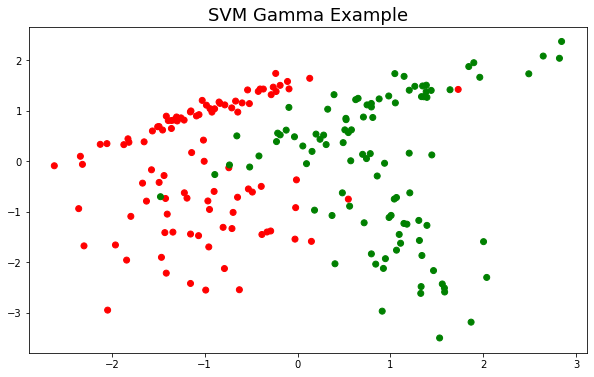

In [29]:
#scatter plot of my dataset
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap=zero_one_colourmap_pts)
#red points signify the class 0 samples and green points signifies the class 1 samples.

In [30]:
# this code is used for plotting the decision boundary

def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap_pts)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

In [31]:
 pca = PCA(n_components = 2)
 X_train2 = pca.fit_transform(X_train)

In [32]:
 X_test2 = pca.fit_transform(X_test)

In [37]:
  rbf_classifier = SVC(kernel="rbf")
  rbf_classifier.fit(X_train2, y_train.ravel())

SVC()

In [38]:
 y_pred = rbf_classifier.predict(X_test2)

In [39]:
accuracy_score(y_test, y_pred)

0.7964143426294821

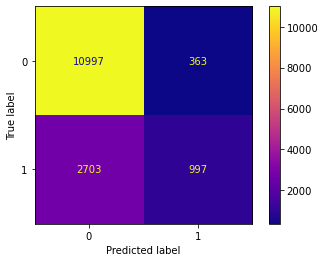

In [41]:
plot_confusion_matrix(rbf_classifier, X_test2, y_test, cmap="plasma")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


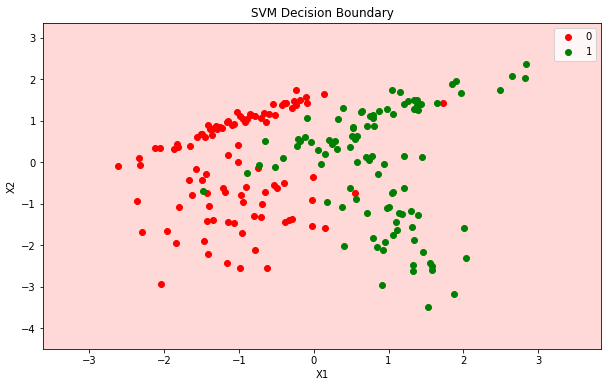

In [44]:
plot_decision_boundary(X, y, rbf_classifier)

In [38]:
  poly_classifier = SVC(kernel="poly")
  poly_classifier.fit(X_train2, y_train.ravel())

SVC(kernel='poly')

In [39]:
 y_pred = poly_classifier.predict(X_test2)

In [40]:
accuracy_score(y_test, y_pred)

0.7755644090305445

In [33]:
rbf_classifier1 = SVC(kernel="rbf", gamma = 0.001, C=1)
rbf_classifier1.fit(X_train2, y_train.ravel())

SVC(C=1, gamma=0.001)

In [34]:
 y_pred1 = rbf_classifier1.predict(X_test2)

In [35]:
accuracy_score(y_test, y_pred1)

0.8231075697211155

In [39]:
rbf_classifier2 = SVC(kernel="rbf", gamma = 0.5, C=10)
rbf_classifier2.fit(X_train2, y_train.ravel())

SVC(C=10, gamma=0.5)

In [40]:
 y_pred2 = rbf_classifier2.predict(X_test2)

In [41]:
accuracy_score(y_test, y_pred2)

0.7543160690571049

In [54]:
rbf_classifier3 = SVC(kernel="rbf", gamma = 0.01, C=10)
rbf_classifier3.fit(X_train2, y_train.ravel())

SVC(C=10, gamma=0.01)

In [55]:
 y_pred3 = rbf_classifier2.predict(X_test2)

In [56]:
accuracy_score(y_test, y_pred3)

0.7543160690571049